In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# make a STA receptive fields
nneurons = 10
nstimdims = 16
NT = 100
ntrials = 25

STAs = np.zeros((nneurons, nstimdims))
for n in range(nneurons):
    STAs[n, n+2:n+4] = 1

STAs /=1000
# make white noise stimuli
A = 3

# compute neuron probabilities
def simulate(STAs, stim):
    
    kern = 1+np.exp(A + -1.0*np.einsum('ij, jkl->ikl', STAs, stim))
    probs = 1/kern
    (a,b,c) = np.shape(probs)
    spikes = 1.0*np.less(np.random.rand(a,b,c), probs)
    return spikes, probs

def compute_STA(stim, spikes):
    (nn, nt, ntri) = np.shape(spikes)
    sta = np.einsum('ijk, ljk->il', spikes, stim) / (nt*ntri)
    return sta

def predicted_1_laplacian(probs):
    corr = 1 - np.einsum('is,js->ijs', probs[:, :, 0], probs[:, :, 0])
    corr_int = np.prod(corr, axis = 2) # integrated probability of not firing
    #adj = np.mean((1- corr_int), axis=2)
    adj = (1-corr_int)
    adj = adj - np.diag(np.diag(adj))
    L = np.diag(np.sum(adj, axis=0)) - adj
    return L

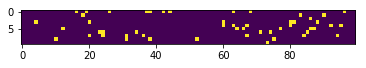

In [61]:
stim = np.random.randn(nstimdims, NT, ntrials)
spikes, probs = simulate(STAs, stim)
plt.imshow(spikes[:, :, 0])
sta = compute_STA(stim, spikes)
L = predicted_1_laplacian(probs)


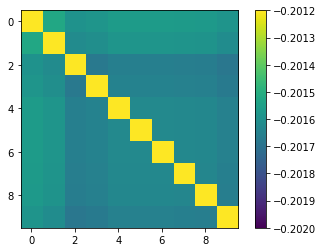

In [79]:
plt.imshow(L, vmin=-0.202, vmax=-0.2012)
plt.colorbar()

In [64]:
corr = 1 - np.einsum('is,js->ijs', probs[:, :, 0], probs[:, :, 0])
corr_int = np.prod(corr, axis = 2) # integrated probability of not firing
#adj = np.mean((1- corr_int), axis=2)
adj = (1-corr_int)
adj = adj - np.diag(np.diag(adj))
L = np.diag(np.sum(adj, axis=0)) - adj

In [72]:
L

array([[ 1.81409397, -0.20152011, -0.20159182, -0.20158255, -0.20155997,
        -0.20156047, -0.20156015, -0.20156439, -0.20156723, -0.20158728],
       [-0.20152011,  1.81427128, -0.20161415, -0.20160468, -0.20158209,
        -0.20158262, -0.2015823 , -0.20158653, -0.20158939, -0.20160942],
       [-0.20159182, -0.20161415,  1.81484651, -0.20167671, -0.20165396,
        -0.2016545 , -0.20165423, -0.20165848, -0.20166131, -0.20168134],
       [-0.20158255, -0.20160468, -0.20167671,  1.81477225, -0.20164487,
        -0.20164523, -0.20164495, -0.20164925, -0.20165203, -0.20167197],
       [-0.20155997, -0.20158209, -0.20165396, -0.20164487,  1.81459152,
        -0.20162284, -0.20162232, -0.20162667, -0.20162947, -0.20164933],
       [-0.20156047, -0.20158262, -0.2016545 , -0.20164523, -0.20162284,
         1.81459568, -0.20162299, -0.20162714, -0.20162999, -0.2016499 ],
       [-0.20156015, -0.2015823 , -0.20165423, -0.20164495, -0.20162232,
        -0.20162299,  1.81459319, -0.201627  